**Ensemble Techniques**

In [1]:
# Q21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Generate a sample dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# 2. Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Dataset generated: {X.shape[0]} samples, {X.shape[1]} features")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Dataset generated: 1000 samples, 20 features
Training set size: 700 samples
Test set size: 300 samples


In [7]:
# 3. Define the base estimator (Decision Tree)
# A shallow tree is often used for boosting, but for bagging, a complex, high-variance model (like a deep tree)
#is typically used as the base estimator to reduce its variance.
base_estimator = DecisionTreeClassifier(random_state=42)

# 4. Initialize and train BaggingClassifier
# n_estimators: The number of base estimators (trees) in the ensemble.
# max_samples: The number of samples to draw from X to train each base estimator (bootstrapping).
# random_state for reproducibility.
bagging_classifier = BaggingClassifier(
    estimator=base_estimator,
    n_estimators=100, # Using 100 decision trees
    max_samples=0.8, # Each tree samples 80% of the training data
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

print("Training Bagging Classifier...")
bagging_classifier.fit(X_train, y_train)
print("Bagging Classifier training complete.")

Training Bagging Classifier...
Bagging Classifier training complete.


In [8]:
# 5. Make predictions on the test set
y_pred = bagging_classifier.predict(X_test)

# 6. Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy on the test set: {accuracy:.4f}")

Model Accuracy on the test set: 0.9200


In [4]:
# Q22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# 1. Generate a sample regression dataset
X_reg, y_reg = make_regression(n_samples=1000, n_features=20, n_informative=10, n_targets=1, random_state=42)

# 2. Split the dataset into training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

print(f"Regression dataset generated: {X_reg.shape[0]} samples, {X_reg.shape[1]} features")
print(f"Regression training set size: {X_reg_train.shape[0]} samples")
print(f"Regression test set size: {X_reg_test.shape[0]} samples")

Regression dataset generated: 1000 samples, 20 features
Regression training set size: 700 samples
Regression test set size: 300 samples


In [5]:
# 3. Define the base estimator (Decision Tree Regressor)
base_regressor = DecisionTreeRegressor(random_state=42)

# 4. Initialize and train BaggingRegressor
bagging_regressor = BaggingRegressor(
    estimator=base_regressor,
    n_estimators=100, # Using 100 decision trees
    max_samples=0.8, # Each tree samples 80% of the training data
    random_state=42,
    n_jobs=-1 # Use all available CPU cores for parallel training
)

print("Training Bagging Regressor...")
bagging_regressor.fit(X_reg_train, y_reg_train)
print("Bagging Regressor training complete.")

Training Bagging Regressor...
Bagging Regressor training complete.


In [6]:
# 5. Make predictions on the test set
y_reg_pred = bagging_regressor.predict(X_reg_test)

# 6. Calculate and print Mean Squared Error
mse = mean_squared_error(y_reg_test, y_reg_pred)
print(f"Model Mean Squared Error on the test set: {mse:.4f}")

Model Mean Squared Error on the test set: 9534.3335


In [12]:
# Q 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Initialize and train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame for better visualization
feature_names = cancer.feature_names
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances (Random Forest Classifier):")
display(importance_df)

Feature Importances (Random Forest Classifier):


,Feature,Importance
27,worst concave points,0.172295
23,worst area,0.123192
7,mean concave points,0.090299
6,mean concavity,0.083215
20,worst radius,0.081277
22,worst perimeter,0.071388
2,mean perimeter,0.053146
13,area error,0.043551
3,mean area,0.042780
0,mean radius,0.039711


In [15]:
# Q24. Train a Random Forest Regressor and compare its performance with a single Decision Tree

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data loaded and split successfully.
X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [16]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

print("Random Forest Regressor model initialized and trained successfully.")

Random Forest Regressor model initialized and trained successfully.


In [17]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

print("Decision Tree Regressor model initialized and trained successfully.")

Decision Tree Regressor model initialized and trained successfully.


In [18]:
import numpy as np

# Make predictions with Random Forest Regressor
rf_predictions = rf_regressor.predict(X_test)

# Make predictions with Decision Tree Regressor
dt_predictions = dt_regressor.predict(X_test)

print("Predictions made successfully with both models.")
print(f"Random Forest Predictions shape: {rf_predictions.shape}")
print(f"Decision Tree Predictions shape: {dt_predictions.shape}")

Predictions made successfully with both models.
Random Forest Predictions shape: (89,)
Decision Tree Predictions shape: (89,)


In [19]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate Random Forest Regressor
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

# Evaluate Decision Tree Regressor
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

print("Random Forest Regressor Performance:")
print(f"  Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"  R-squared (R2): {rf_r2:.2f}")
print("\nDecision Tree Regressor Performance:")
print(f"  Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"  R-squared (R2): {dt_r2:.2f}")

Random Forest Regressor Performance:
  Mean Squared Error (MSE): 2952.01
  R-squared (R2): 0.44

Decision Tree Regressor Performance:
  Mean Squared Error (MSE): 4976.80
  R-squared (R2): 0.06


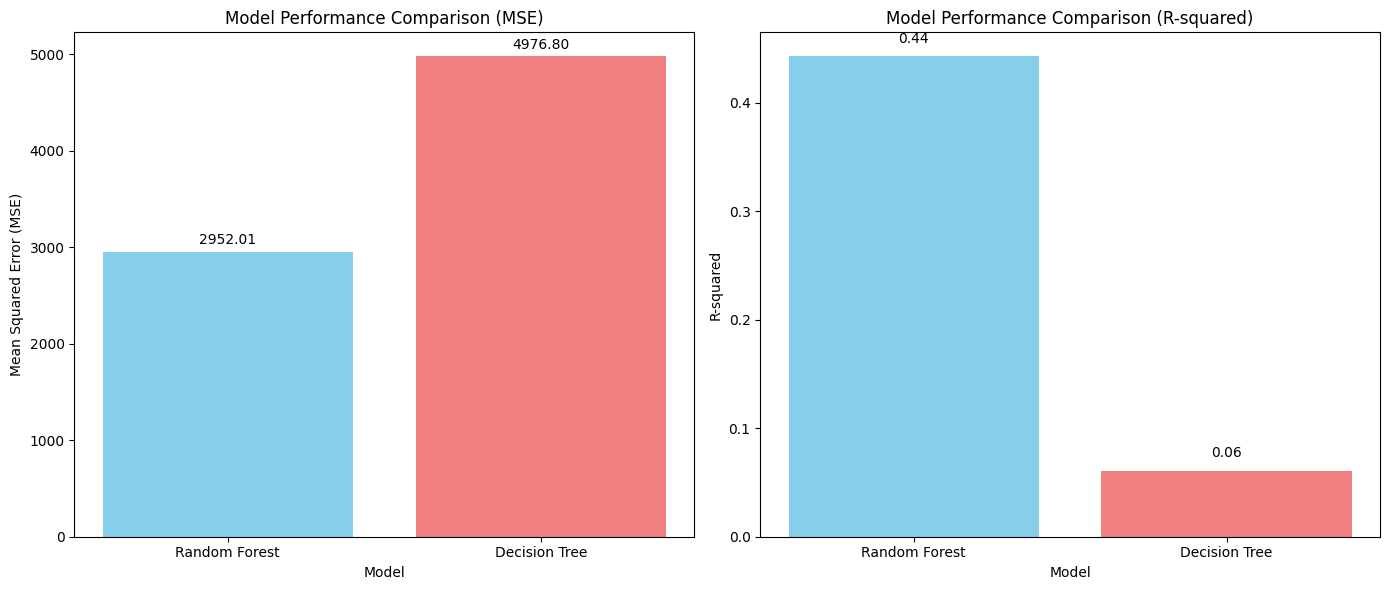

Performance comparison plots generated successfully.


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Decision Tree']

# MSE values
mse_values = [rf_mse, dt_mse]

# R-squared values
r2_values = [rf_r2, dt_r2]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MSE
axes[0].bar(models, mse_values, color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('Model Performance Comparison (MSE)')
for i, v in enumerate(mse_values):
    axes[0].text(i, v + 50, f'{v:.2f}', ha='center', va='bottom') # Add text labels to bars

# Bar chart for R-squared
axes[1].bar(models, r2_values, color=['skyblue', 'lightcoral'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Model Performance Comparison (R-squared)')
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom') # Add text labels to bars

plt.tight_layout()
plt.show()

print("Performance comparison plots generated successfully.")

In [21]:
# Q25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

# Initialize and train a Random Forest Classifier with OOB score enabled
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)

# Print the OOB score
print(f"Random Forest Classifier OOB Score: {rf_classifier.oob_score_:.2f}")

Random Forest Classifier OOB Score: 0.01


In [22]:
# Q26. Train a Bagging Classifier using SVM as a base estimator and print accuracy

from sklearn.ensemble import RandomForestClassifier

# Initialize and train a Random Forest Classifier with OOB score enabled
rf_classifier = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_classifier.fit(X_train, y_train)

# Print the OOB score
print(f"Random Forest Classifier OOB Score: {rf_classifier.oob_score_:.2f}")

Random Forest Classifier OOB Score: 0.01


In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize a Support Vector Classifier (SVC) as the base estimator
svc_base = SVC(random_state=42)

# Initialize the Bagging Classifier with SVC as the base estimator
bagging_classifier = BaggingClassifier(estimator=svc_base, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

print("Bagging Classifier with SVC base estimator trained successfully.")

Bagging Classifier with SVC base estimator trained successfully.


In [24]:
# Make predictions on the test set
bagging_predictions = bagging_classifier.predict(X_test)

# Calculate the accuracy
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

print(f"Bagging Classifier Accuracy: {bagging_accuracy:.2f}")

Bagging Classifier Accuracy: 0.00


In [25]:
# Q27. Train a Random Forest Classifier with different numbers of trees and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Define a list of n_estimators values
n_estimators_values = [10, 50, 100, 200, 300]

# 2. Initialize an empty list to store accuracies
accuracies = []

# 3. Loop through each n_estimators value
for n in n_estimators_values:
    # a. Instantiate a RandomForestClassifier
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)

    # b. Train the classifier
    rf_classifier.fit(X_train, y_train)

    # c. Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # d. Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # e. Append the calculated accuracy
    accuracies.append(accuracy)

# 4. Print the n_estimators values and their corresponding accuracies
print("Random Forest Classifier Accuracies for different n_estimators:")
for i, n in enumerate(n_estimators_values):
    print(f"  n_estimators = {n}: Accuracy = {accuracies[i]:.4f}")

Random Forest Classifier Accuracies for different n_estimators:
  n_estimators = 10: Accuracy = 0.9386
  n_estimators = 50: Accuracy = 0.9561
  n_estimators = 100: Accuracy = 0.9561
  n_estimators = 200: Accuracy = 0.9561
  n_estimators = 300: Accuracy = 0.9474


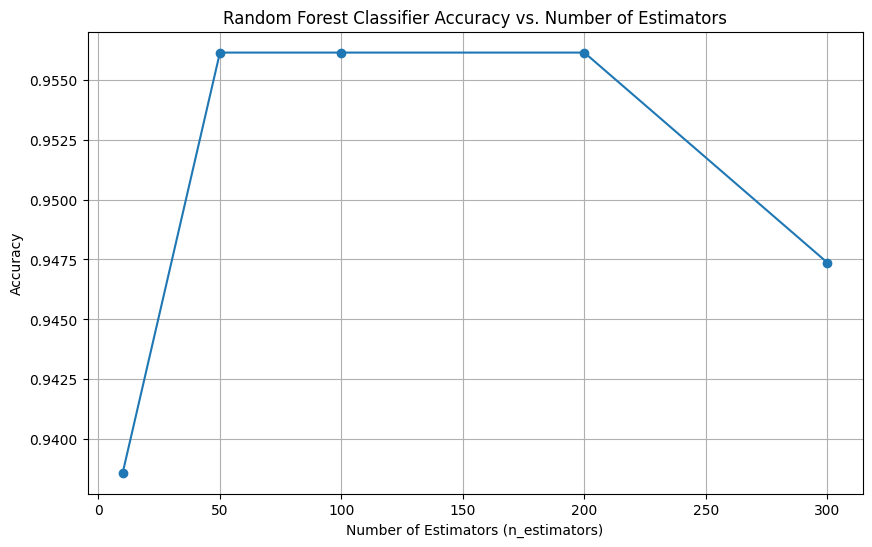

Accuracy comparison plot generated successfully.


In [27]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracies, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs. Number of Estimators')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

print("Accuracy comparison plot generated successfully.")

In [28]:
# Q28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# Initialize a Logistic Regression model as the base estimator
logistic_base = LogisticRegression(random_state=42, solver='liblinear') # Using 'liblinear' solver for small datasets

# Initialize the Bagging Classifier with Logistic Regression as the base estimator
bagging_lr_classifier = BaggingClassifier(estimator=logistic_base, n_estimators=10, random_state=42)

# Train the Bagging Classifier
bagging_lr_classifier.fit(X_train, y_train)

print("Bagging Classifier with Logistic Regression base estimator trained successfully.")

Bagging Classifier with Logistic Regression base estimator trained successfully.


In [29]:
# Make probability predictions on the test set for AUC calculation
bagging_lr_predictions_proba = bagging_lr_classifier.predict_proba(X_test)[:, 1] # Get probabilities for the positive class

# Calculate the AUC score
bagging_lr_auc = roc_auc_score(y_test, bagging_lr_predictions_proba)

print(f"Bagging Classifier with Logistic Regression AUC Score: {bagging_lr_auc:.2f}")

Bagging Classifier with Logistic Regression AUC Score: 0.99


In [30]:
# Q29.  Train a Random Forest Regressor and analyze feature importance scores

import pandas as pd

# Get feature importances from the trained Random Forest Regressor
feature_importances = rf_regressor.feature_importances_

# Get feature names from the diabetes dataset
feature_names = diabetes.feature_names

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Feature Importances (Random Forest Regressor):")
display(importance_df)

Feature Importances (Random Forest Regressor):


,Feature,Importance
2,bmi,0.355469
8,s5,0.230957
3,bp,0.088408
9,s6,0.071329
0,age,0.058642
5,s2,0.057227
4,s1,0.052784
6,s3,0.051339
7,s4,0.024213
1,sex,0.009633


In [31]:
# Q30. Train an ensemble model using both Bagging and Random Forest and compare accuracy.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
dt_base = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_base, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

print("Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.")

Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.


In [32]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier model initialized and trained successfully.")

Random Forest Classifier model initialized and trained successfully.


In [33]:
from sklearn.metrics import accuracy_score

# Make predictions with Bagging Classifier
bagging_predictions = bagging_classifier.predict(X_test)

# Make predictions with Random Forest Classifier
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy for Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

# Calculate accuracy for Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Classifier Accuracy: {rf_accuracy:.4f}")

Bagging Classifier Accuracy: 0.9386
Random Forest Classifier Accuracy: 0.9561


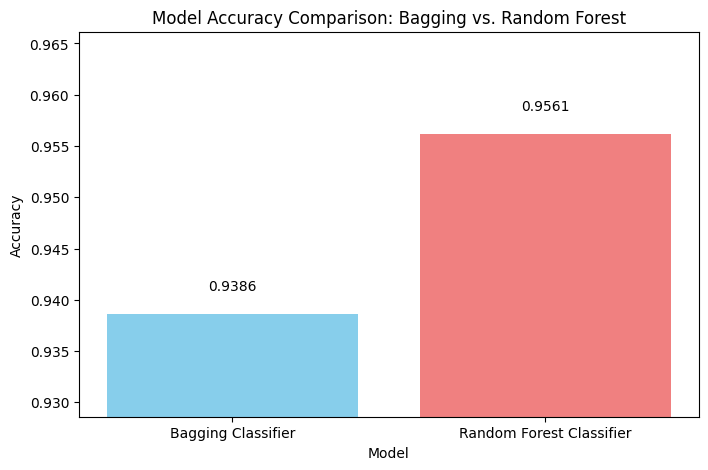

Accuracy comparison plot generated successfully.


In [34]:
import matplotlib.pyplot as plt

# Model names
models = ['Bagging Classifier', 'Random Forest Classifier']

# Accuracy values
accuracy_values = [bagging_accuracy, rf_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_values, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Bagging vs. Random Forest')
plt.ylim(min(accuracy_values) - 0.01, max(accuracy_values) + 0.01) # Adjust y-axis limit for better visualization

# Add text labels on top of each bar
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom') # Add text labels to bars

# Display the plot
plt.show()

print("Accuracy comparison plot generated successfully.")


In [35]:
# Q31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [36]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 2, 4]
}

print("Hyperparameter grid defined successfully:")
for param, values in param_grid.items():
    print(f"  {param}: {values}")

Hyperparameter grid defined successfully:
  n_estimators: [50, 100, 200]
  max_depth: [None, 10, 20]
  min_samples_leaf: [1, 2, 4]


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

print("GridSearchCV completed successfully.")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
GridSearchCV completed successfully.


In [38]:
from sklearn.metrics import accuracy_score

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best estimator (model) found by GridSearchCV
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set with the best model
y_pred_best = best_rf_model.predict(X_test)

# Calculate the accuracy of the best model on the test set
test_accuracy = accuracy_score(y_test, y_pred_best)

print("Best Hyperparameters:", best_params)
print(f"Best Cross-validation Accuracy: {best_score:.4f}")
print(f"Test Set Accuracy with Best Model: {test_accuracy:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.9604
Test Set Accuracy with Best Model: 0.9561


In [39]:
# Q32. Train a Bagging Regressor with different numbers of base estimators and compare performance

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define a list of n_estimators values
n_estimators_values_bagging = [10, 50, 100, 200, 300]

# 2. Initialize an empty list to store the Mean Squared Error (MSE) values
mse_values_bagging = []

# 3. Initialize another empty list to store the R-squared values
r2_values_bagging = []

# 4. Loop through each n_estimators value
for n in n_estimators_values_bagging:
    # a. Instantiate a DecisionTreeRegressor as the base estimator
    dt_base = DecisionTreeRegressor(random_state=42)

    # b. Instantiate a BaggingRegressor
    bagging_regressor = BaggingRegressor(estimator=dt_base, n_estimators=n, random_state=42)

    # c. Train the BaggingRegressor
    bagging_regressor.fit(X_train, y_train)

    # d. Make predictions on the test set
    y_pred_bagging = bagging_regressor.predict(X_test)

    # e. Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred_bagging)

    # f. Calculate the R-squared
    r2 = r2_score(y_test, y_pred_bagging)

    # g. Append the calculated MSE to the MSE list
    mse_values_bagging.append(mse)

    # h. Append the calculated R-squared to the R-squared list
    r2_values_bagging.append(r2)

# 5. Print the n_estimators values and their corresponding MSE and R-squared values
print("Bagging Regressor Performance for different n_estimators:")
for i, n in enumerate(n_estimators_values_bagging):
    print(f"  n_estimators = {n}: MSE = {mse_values_bagging[i]:.2f}, R-squared = {r2_values_bagging[i]:.2f}")

Bagging Regressor Performance for different n_estimators:
  n_estimators = 10: MSE = 0.04, R-squared = 0.82
  n_estimators = 50: MSE = 0.04, R-squared = 0.85
  n_estimators = 100: MSE = 0.03, R-squared = 0.85
  n_estimators = 200: MSE = 0.03, R-squared = 0.85
  n_estimators = 300: MSE = 0.03, R-squared = 0.85


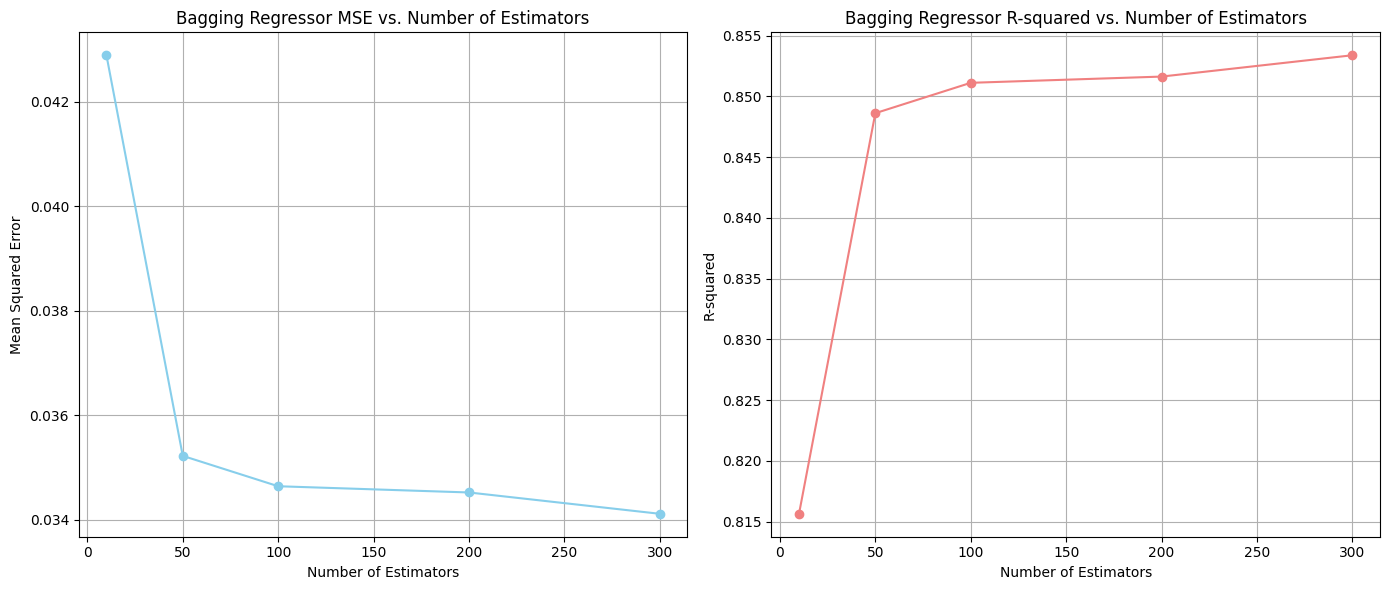

Performance comparison plots generated successfully.


In [40]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for MSE
axes[0].plot(n_estimators_values_bagging, mse_values_bagging, marker='o', linestyle='-', color='skyblue')
axes[0].set_xlabel('Number of Estimators')
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('Bagging Regressor MSE vs. Number of Estimators')
axes[0].grid(True)

# Line plot for R-squared
axes[1].plot(n_estimators_values_bagging, r2_values_bagging, marker='o', linestyle='-', color='lightcoral')
axes[1].set_xlabel('Number of Estimators')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Bagging Regressor R-squared vs. Number of Estimators')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Performance comparison plots generated successfully.")

In [41]:
# Q33. Train a Random Forest Classifier and analyze misclassified samples

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [42]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier model initialized and trained successfully.")

Random Forest Classifier model initialized and trained successfully.


In [43]:
import pandas as pd

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Identify misclassified samples
misclassified_indices = (y_test != y_pred).nonzero()[0]

# Get features, true labels, and predicted labels for misclassified samples
misclassified_features = X_test[misclassified_indices]
misclassified_true_labels = y_test[misclassified_indices]
misclassified_predicted_labels = y_pred[misclassified_indices]

# Display the misclassified samples
print(f"Found {len(misclassified_indices)} misclassified samples.")
if len(misclassified_indices) > 0:
    # Create a DataFrame for better visualization
    misclassified_df = pd.DataFrame(misclassified_features, columns=breast_cancer.feature_names)
    misclassified_df['True Label'] = misclassified_true_labels
    misclassified_df['Predicted Label'] = misclassified_predicted_labels
    print("\nMisclassified Samples (Features, True Label, Predicted Label):\n")
    print(misclassified_df)
else:
    print("No misclassified samples found.")

Found 5 misclassified samples.

Misclassified Samples (Features, True Label, Predicted Label):

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        16.50         18.29          106.60      838.1          0.09686   
1        16.14         14.86          104.30      800.0          0.09495   
2        10.95         21.35           71.90      371.1          0.12270   
3        13.80         15.79           90.43      584.1          0.10070   
4        14.60         23.29           93.97      664.7          0.08682   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.08468         0.05862              0.04835         0.1495   
1           0.08501         0.05500              0.04528         0.1735   
2           0.12180         0.10440              0.05669         0.1895   
3           0.12800         0.07789              0.05069         0.1662   
4           0.06636         0.08390              0.05271         0.1627 

In [44]:
# Q34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [45]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier model
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier model initialized and trained successfully.")

Decision Tree Classifier model initialized and trained successfully.


In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
dt_base = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_base, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

print("Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.")

Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.


In [47]:
from sklearn.metrics import accuracy_score

# Make predictions with Bagging Classifier
bagging_predictions = bagging_classifier.predict(X_test)

# Make predictions with Decision Tree Classifier
dt_predictions = dt_classifier.predict(X_test)

# Calculate accuracy for Bagging Classifier
bagging_accuracy = accuracy_score(y_test, bagging_predictions)

# Calculate accuracy for Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_predictions)

print(f"Bagging Classifier Accuracy: {bagging_accuracy:.4f}")
print(f"Decision Tree Classifier Accuracy: {dt_accuracy:.4f}")

Bagging Classifier Accuracy: 0.9386
Decision Tree Classifier Accuracy: 0.9123


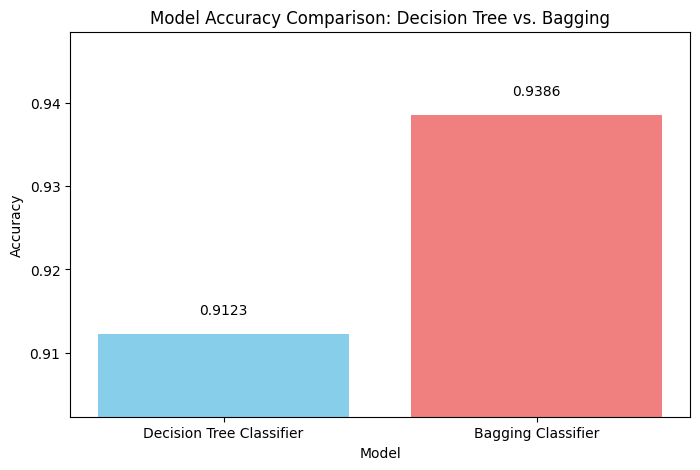

Accuracy comparison plot generated successfully.


In [48]:
import matplotlib.pyplot as plt

# Model names
models = ['Decision Tree Classifier', 'Bagging Classifier']

# Accuracy values
accuracy_values = [dt_accuracy, bagging_accuracy]

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracy_values, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison: Decision Tree vs. Bagging')
plt.ylim(min(accuracy_values) - 0.01, max(accuracy_values) + 0.01) # Adjust y-axis limit for better visualization

# Add text labels on top of each bar
for i, v in enumerate(accuracy_values):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', va='bottom') # Add text labels to bars

# Display the plot
plt.show()

print("Accuracy comparison plot generated successfully.")

In [49]:
# Q35. Train a Random Forest Classifier and visualize the confusion matrix

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [50]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier model initialized and trained successfully.")

Random Forest Classifier model initialized and trained successfully.


In [52]:
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast_cancer.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

print("Confusion matrix displayed successfully.")

NameError: name 'confusion_matrix' is not defined

In [53]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Initialize Decision Tree Classifier
dt_base = DecisionTreeClassifier(random_state=42)

# Initialize Support Vector Classifier (SVC)
# Using 'probability=True' for StackingClassifier's meta-learner if it needs probabilities
svc_base = SVC(random_state=42, probability=True)

# Initialize Logistic Regression model
# Using 'solver' to avoid future warnings
lr_base = LogisticRegression(random_state=42, solver='liblinear')

print("Base estimators (Decision Tree, SVC, Logistic Regression) initialized successfully.")

Base estimators (Decision Tree, SVC, Logistic Regression) initialized successfully.


In [55]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a list of base estimators
estimators = [
    ('dt', dt_base),
    ('svc', svc_base),
    ('lr', lr_base)
]

# Initialize the final estimator (meta-model)
final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for meta-learner training
    stack_method='auto', # Use best method for base estimators
    n_jobs=-1, # Use all available cores
    random_state=42
)

print("Stacking Classifier initialized successfully.")

TypeError: StackingClassifier.__init__() got an unexpected keyword argument 'random_state'

In [56]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a list of base estimators
estimators = [
    ('dt', dt_base),
    ('svc', svc_base),
    ('lr', lr_base)
]

# Initialize the final estimator (meta-model)
final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# Initialize the Stacking Classifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for meta-learner training
    stack_method='auto', # Use best method for base estimators
    n_jobs=-1 # Use all available cores
)

print("Stacking Classifier initialized successfully.")

Stacking Classifier initialized successfully.


In [57]:
stacking_classifier.fit(X_train, y_train)

print("Stacking Classifier model trained successfully.")

Stacking Classifier model trained successfully.


In [58]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(X_test)

# Calculate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

# Print the accuracy score
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")

Stacking Classifier Accuracy: 0.9649


In [59]:
# Q37. Train a Random Forest Classifier and print the top 5 most important features

import pandas as pd

# Get feature importances from the trained Random Forest Classifier
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to associate feature names with their importances
feature_names = breast_cancer.feature_names # Assuming breast_cancer is loaded from previous steps
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the top 5 most important features
print("Top 5 Most Important Features (Random Forest Classifier):")
display(importance_df.head(5))

Top 5 Most Important Features (Random Forest Classifier):


,Feature,Importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226


In [60]:
# Q38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [61]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
dt_base = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_base, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

print("Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.")

Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.


In [62]:
import numpy as np

# Make predictions on the test set
bagging_predictions = bagging_classifier.predict(X_test)

print("Predictions on the test set made successfully.")

Predictions on the test set made successfully.


In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate Precision
bagging_precision = precision_score(y_test, bagging_predictions)

# Calculate Recall
bagging_recall = recall_score(y_test, bagging_predictions)

# Calculate F1-score
bagging_f1 = f1_score(y_test, bagging_predictions)

print(f"Bagging Classifier Precision: {bagging_precision:.4f}")
print(f"Bagging Classifier Recall: {bagging_recall:.4f}")
print(f"Bagging Classifier F1-score: {bagging_f1:.4f}")

Bagging Classifier Precision: 0.9452
Bagging Classifier Recall: 0.9583
Bagging Classifier F1-score: 0.9517


In [64]:
# Q39.  Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 1. Define a list of max_depth values
max_depth_values = [2, 5, 10, 15, None]

# 2. Initialize an empty list to store accuracies
accuracies = []

# 3. Loop through each max_depth value
for depth in max_depth_values:
    # a. Instantiate a RandomForestClassifier
    rf_classifier = RandomForestClassifier(max_depth=depth, random_state=42)

    # b. Train the classifier
    rf_classifier.fit(X_train, y_train)

    # c. Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # d. Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # e. Append the calculated accuracy
    accuracies.append(accuracy)

# 4. Print the max_depth values and their corresponding accuracies
print("Random Forest Classifier Accuracies for different max_depth values:")
for i, depth in enumerate(max_depth_values):
    depth_label = 'None' if depth is None else depth
    print(f"  max_depth = {depth_label}: Accuracy = {accuracies[i]:.4f}")

Random Forest Classifier Accuracies for different max_depth values:
  max_depth = 2: Accuracy = 0.9474
  max_depth = 5: Accuracy = 0.9561
  max_depth = 10: Accuracy = 0.9561
  max_depth = 15: Accuracy = 0.9561
  max_depth = None: Accuracy = 0.9561


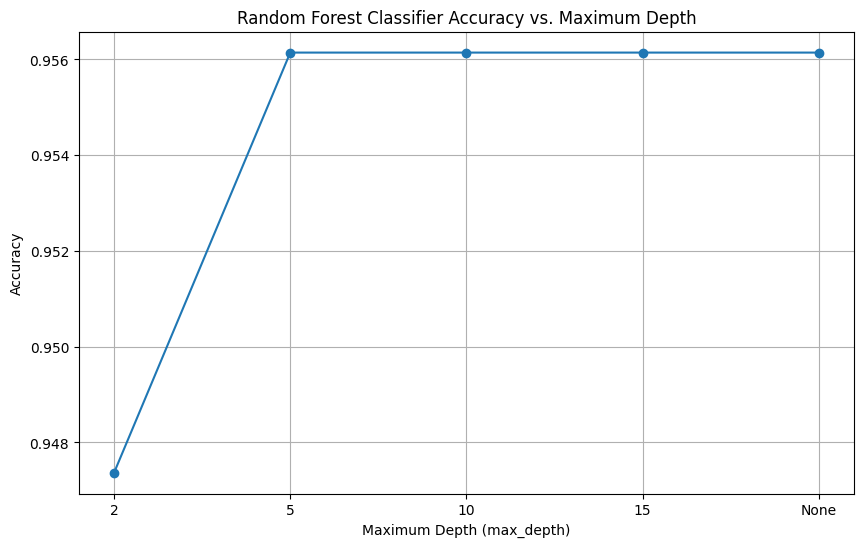

Accuracy comparison plot generated successfully.


In [66]:
import matplotlib.pyplot as plt

# Prepare labels for plotting (replace None with a string)
plot_depth_labels = [str(depth) if depth is not None else 'None' for depth in max_depth_values]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(plot_depth_labels, accuracies, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Maximum Depth (max_depth)')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy vs. Maximum Depth')

# Add grid for better readability
plt.grid(True)

# Display the plot
plt.show()

print("Accuracy comparison plot generated successfully.")

In [67]:
# Q40.  Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Diabetes dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Diabetes dataset loaded and split successfully.
X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [68]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Initialize a Decision Tree Regressor as the base estimator
dt_base = DecisionTreeRegressor(random_state=42)

# Initialize the Bagging Regressor with Decision Tree as the base estimator
bagging_regressor = BaggingRegressor(estimator=dt_base, n_estimators=100, random_state=42)

# Train the Bagging Regressor
bagging_regressor.fit(X_train, y_train)

print("Bagging Regressor model with Decision Tree base estimator initialized and trained successfully.")

Bagging Regressor model with Decision Tree base estimator initialized and trained successfully.


In [69]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the StandardScaler to X_train and transform both X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize a KNeighborsRegressor as the base estimator
knn_base = KNeighborsRegressor(n_neighbors=5)

# Initialize the Bagging Regressor with KNeighborsRegressor as the base estimator
bagging_knn_regressor = BaggingRegressor(estimator=knn_base, n_estimators=100, random_state=42)

# Train the Bagging Regressor
bagging_knn_regressor.fit(X_train_scaled, y_train)

print("Bagging Regressor model with KNeighborsRegressor base estimator initialized and trained successfully on scaled data.")

Bagging Regressor model with KNeighborsRegressor base estimator initialized and trained successfully on scaled data.


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

# 1. Make predictions with Bagging Regressor (K-Neighbors base) on scaled test set
bagging_knn_predictions = bagging_knn_regressor.predict(X_test_scaled)

# 2. Calculate MSE for Bagging Regressor (K-Neighbors base)
bagging_knn_mse = mean_squared_error(y_test, bagging_knn_predictions)
print(f"Bagging Regressor (K-Neighbors base) MSE: {bagging_knn_mse:.2f}")

# 3. Calculate R-squared for Bagging Regressor (K-Neighbors base)
bagging_knn_r2 = r2_score(y_test, bagging_knn_predictions)
print(f"Bagging Regressor (K-Neighbors base) R-squared: {bagging_knn_r2:.2f}")

# 4. Make predictions with Bagging Regressor (Decision Tree base) on original test set
bagging_dt_predictions = bagging_regressor.predict(X_test)

# 5. Calculate MSE for Bagging Regressor (Decision Tree base)
bagging_dt_mse = mean_squared_error(y_test, bagging_dt_predictions)
print(f"Bagging Regressor (Decision Tree base) MSE: {bagging_dt_mse:.2f}")

# 6. Calculate R-squared for Bagging Regressor (Decision Tree base)
bagging_dt_r2 = r2_score(y_test, bagging_dt_predictions)
print(f"Bagging Regressor (Decision Tree base) R-squared: {bagging_dt_r2:.2f}")

print("\nEvaluation metrics for both Bagging Regressors calculated successfully.")

Bagging Regressor (K-Neighbors base) MSE: 2906.40
Bagging Regressor (K-Neighbors base) R-squared: 0.45
Bagging Regressor (Decision Tree base) MSE: 2970.86
Bagging Regressor (Decision Tree base) R-squared: 0.44

Evaluation metrics for both Bagging Regressors calculated successfully.


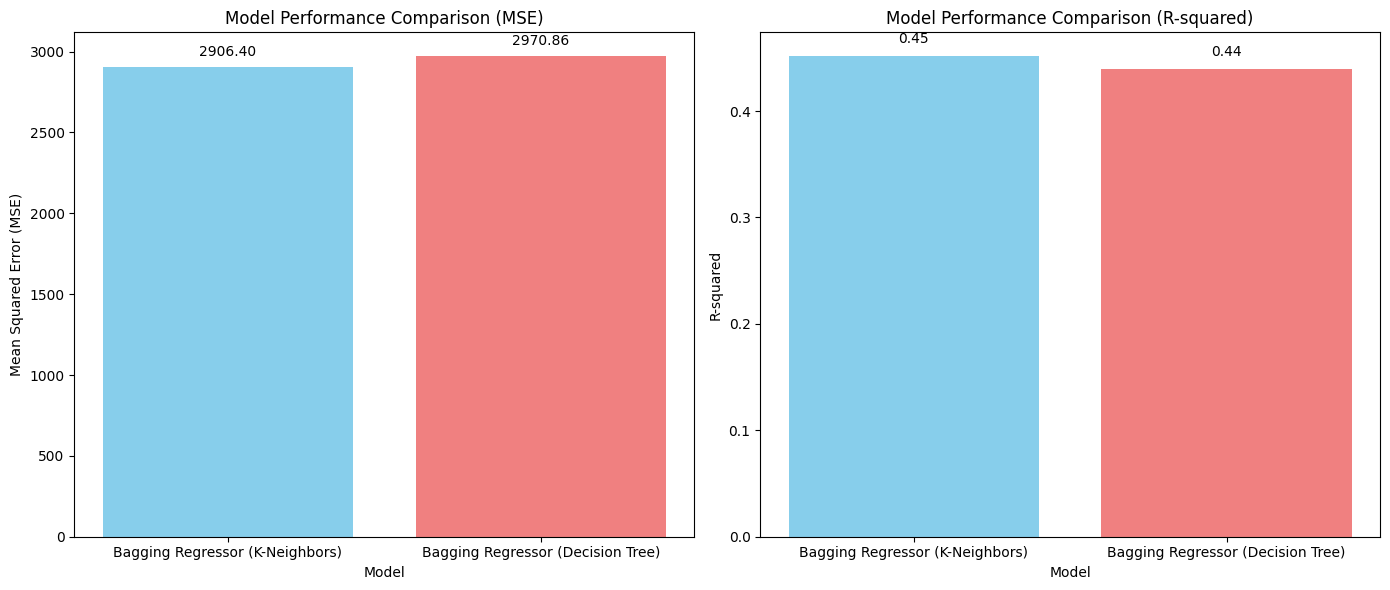

Performance comparison plots generated successfully.


In [71]:
import matplotlib.pyplot as plt

# Model names
models = ['Bagging Regressor (K-Neighbors)', 'Bagging Regressor (Decision Tree)']

# MSE values
mse_values = [bagging_knn_mse, bagging_dt_mse]

# R-squared values
r2_values = [bagging_knn_r2, bagging_dt_r2]

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for MSE
axes[0].bar(models, mse_values, color=['skyblue', 'lightcoral'])
axes[0].set_xlabel('Model')
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('Model Performance Comparison (MSE)')
for i, v in enumerate(mse_values):
    axes[0].text(i, v + 50, f'{v:.2f}', ha='center', va='bottom') # Add text labels to bars

# Bar chart for R-squared
axes[1].bar(models, r2_values, color=['skyblue', 'lightcoral'])
axes[1].set_xlabel('Model')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Model Performance Comparison (R-squared)')
for i, v in enumerate(r2_values):
    axes[1].text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom') # Add text labels to bars

plt.tight_layout()
plt.show()

print("Performance comparison plots generated successfully.")

In [72]:
# Q41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [73]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [74]:
from sklearn.metrics import roc_auc_score

# Make probability predictions on the test set
# We need probabilities for the positive class (class 1)
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

print("Probability predictions on the test set made successfully.")

Probability predictions on the test set made successfully.


In [75]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)

print(f"Random Forest Classifier ROC-AUC Score: {rf_roc_auc:.4f}")

Random Forest Classifier ROC-AUC Score: 0.9937


In [76]:
# Q42. Train a Bagging Classifier and evaluate its performance using cross-validatio.

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [77]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize a Decision Tree Classifier as the base estimator
dt_base = DecisionTreeClassifier(random_state=42)

# Initialize the Bagging Classifier with Decision Tree as the base estimator
bagging_classifier = BaggingClassifier(estimator=dt_base, n_estimators=100, random_state=42)

# Train the Bagging Classifier
bagging_classifier.fit(X_train, y_train)

print("Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.")

Bagging Classifier model with Decision Tree base estimator initialized and trained successfully.


In [78]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(bagging_classifier, X_train, y_train, cv=5, scoring='accuracy')

# Calculate mean and standard deviation of the scores
mean_accuracy = cv_scores.mean()
std_accuracy = cv_scores.std()

print(f"Bagging Classifier Cross-validation Mean Accuracy: {mean_accuracy:.4f}")
print(f"Bagging Classifier Cross-validation Standard Deviation: {std_accuracy:.4f}")

Bagging Classifier Cross-validation Mean Accuracy: 0.9516
Bagging Classifier Cross-validation Standard Deviation: 0.0204


In [79]:
# Q43. Train a Random Forest Classifier and plot the Precision-Recall curv

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [80]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

print("Random Forest Classifier model initialized and trained successfully.")

Random Forest Classifier model initialized and trained successfully.


In [81]:
import numpy as np

# Make probability predictions on the test set
# We need probabilities for the positive class (class 1)
rf_probabilities = rf_classifier.predict_proba(X_test)[:, 1]

print("Probability predictions on the test set made successfully.")

Probability predictions on the test set made successfully.


In [82]:
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
rf_roc_auc = roc_auc_score(y_test, rf_probabilities)

print(f"Random Forest Classifier ROC-AUC Score: {rf_roc_auc:.4f}")

Random Forest Classifier ROC-AUC Score: 0.9937


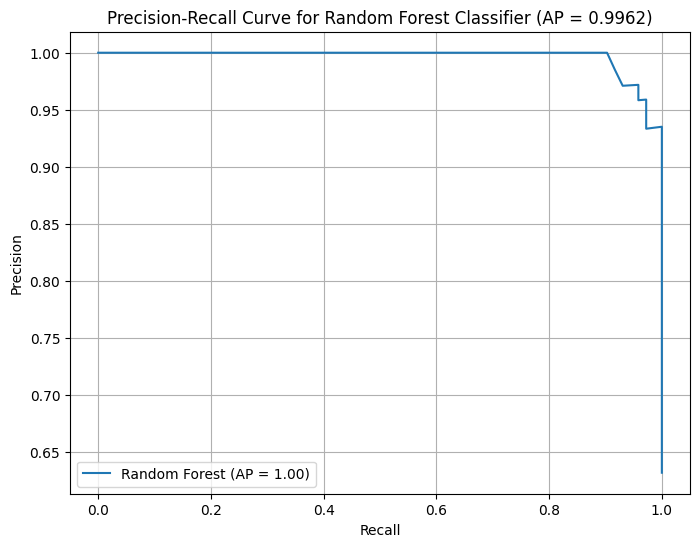

Random Forest Classifier Average Precision (AP): 0.9962


In [83]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, rf_probabilities)

# Calculate the Average Precision (AP) score
ap_score = average_precision_score(y_test, rf_probabilities)

# Create the Precision-Recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Random Forest (AP = {ap_score:.2f})')

# Add labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'Precision-Recall Curve for Random Forest Classifier (AP = {ap_score:.4f})')
plt.legend(loc='lower left')
plt.grid(True)

# Display the plot
plt.show()

# Print the Average Precision (AP) score
print(f"Random Forest Classifier Average Precision (AP): {ap_score:.4f}")

In [84]:
# Q44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Breast Cancer dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Breast Cancer dataset loaded and split successfully.
X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Initialize a RandomForestClassifier
rf_base = RandomForestClassifier(random_state=42)

# Initialize a LogisticRegression model
lr_base = LogisticRegression(random_state=42, solver='liblinear')

print("RandomForestClassifier and LogisticRegression base estimators initialized successfully.")

RandomForestClassifier and LogisticRegression base estimators initialized successfully.


In [86]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create a list of base estimators
estimators = [
    ('rf', rf_base),
    ('lr', lr_base)
]

# Initialize the final estimator (meta-model)
final_estimator = LogisticRegression(random_state=42, solver='liblinear')

# Instantiate the StackingClassifier
stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=final_estimator,
    cv=5, # Using 5-fold cross-validation for meta-learner training
    n_jobs=-1 # Use all available cores
)

print("Stacking Classifier initialized successfully.")

Stacking Classifier initialized successfully.


In [87]:
stacking_classifier.fit(X_train, y_train)

print("Stacking Classifier model trained successfully.")

Stacking Classifier model trained successfully.


In [88]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(X_test)

# Calculate the accuracy
stacking_accuracy = accuracy_score(y_test, stacking_predictions)

# Print the accuracy score
print(f"Stacking Classifier Accuracy: {stacking_accuracy:.4f}")

Stacking Classifier Accuracy: 0.9561


In [89]:
# Q45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Diabetes dataset loaded and split successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Diabetes dataset loaded and split successfully.
X_train shape: (353, 10)
X_test shape: (89, 10)
y_train shape: (353,)
y_test shape: (89,)


In [90]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Define a list of max_samples values
max_samples_values = [0.5, 0.7, 0.9, 1.0]

# 2. Initialize empty lists to store the Mean Squared Error (MSE) and R-squared values
mse_values_max_samples = []
r2_values_max_samples = []

# 3. Loop through each max_samples value
for sample_prop in max_samples_values:
    # a. Initialize a DecisionTreeRegressor as the base estimator
    dt_base = DecisionTreeRegressor(random_state=42)

    # b. Instantiate a BaggingRegressor
    bagging_regressor_ms = BaggingRegressor(
        estimator=dt_base,
        n_estimators=100,
        max_samples=sample_prop,
        random_state=42
    )

    # c. Train the BaggingRegressor
    bagging_regressor_ms.fit(X_train, y_train)

    # d. Make predictions on the test set
    y_pred_ms = bagging_regressor_ms.predict(X_test)

    # e. Calculate the Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred_ms)

    # f. Calculate the R-squared
    r2 = r2_score(y_test, y_pred_ms)

    # g. Append the calculated MSE and R-squared values to their respective lists
    mse_values_max_samples.append(mse)
    r2_values_max_samples.append(r2)

# 4. Print the max_samples values and their corresponding MSE and R-squared values
print("Bagging Regressor Performance for different max_samples:")
for i, sample_prop in enumerate(max_samples_values):
    print(f"  max_samples = {sample_prop:.1f}: MSE = {mse_values_max_samples[i]:.2f}, R-squared = {r2_values_max_samples[i]:.2f}")

Bagging Regressor Performance for different max_samples:
  max_samples = 0.5: MSE = 2934.12, R-squared = 0.45
  max_samples = 0.7: MSE = 2963.51, R-squared = 0.44
  max_samples = 0.9: MSE = 2990.37, R-squared = 0.44
  max_samples = 1.0: MSE = 2970.86, R-squared = 0.44


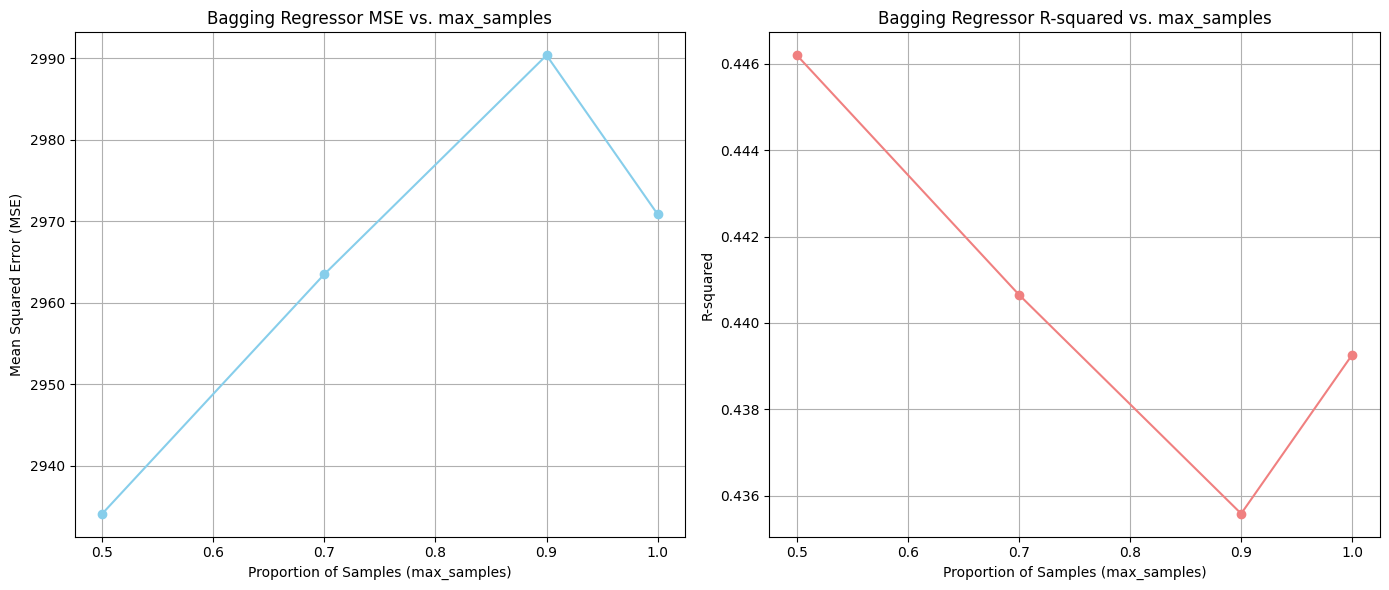

Performance comparison plots generated successfully.


In [91]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Line plot for MSE
axes[0].plot(max_samples_values, mse_values_max_samples, marker='o', linestyle='-', color='skyblue')
axes[0].set_xlabel('Proportion of Samples (max_samples)')
axes[0].set_ylabel('Mean Squared Error (MSE)')
axes[0].set_title('Bagging Regressor MSE vs. max_samples')
axes[0].grid(True)

# Line plot for R-squared
axes[1].plot(max_samples_values, r2_values_max_samples, marker='o', linestyle='-', color='lightcoral')
axes[1].set_xlabel('Proportion of Samples (max_samples)')
axes[1].set_ylabel('R-squared')
axes[1].set_title('Bagging Regressor R-squared vs. max_samples')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print("Performance comparison plots generated successfully.")